In [1]:
import pandas as pd, numpy as np
from sklearn.preprocessing import MinMaxScaler

# Analysis

The project aim is to create a Machine Learning model capable of detecting the dates when a crop field has been manured, using satellite data. <br>
Before even starting considering models, it is useful to perform exploratory analysis on the previously extracted features.

Preliminary data analysis and data analysis in general are crucial in EO (Earth Observation) because they enable us to extract valuable information from vast amounts of data collected by remote sensing instruments. Here are some of the key reasons why data analysis is helpful in EO:
* **Identify patterns and trends:** it can allow us to identify patterns and trends in EO data that might not be immediately visible. By analyzing different types of data, we can identify correlations, trends, and other patterns that can provide insight into the underlying processes that are affecting the Earth's surface.
* **Quality control:** it is crucial for quality control of EO data. By examining data for outliers, errors, and anomalies, we can ensure that the data is accurate and reliable. This is important for maintaining the integrity of long-term datasets and for ensuring that the data can be used for scientific research.
* **Visualization:** it allows us to visualize EO data in various ways, including maps, charts, and graphs. This helps us to understand the data better and to communicate our findings more effectively to policymakers, stakeholders, and the public.

## Load the already generated features-extracted datasets

In [2]:
# Sentinel 2
s2_df = pd.read_csv('../Datasets/main/main-fields-s2-features-extracted.gz', compression='gzip')
s2_df

,crop_field_name,s2_acquisition_date,B1,B2,B3,B4,B5,B6,B7,B8,...,CARI1,CARI2,MCARI,MCARI1,MCARI2,BSI,GLI,ALTERATION,SDI,manure_dates
0,P-BLD,2022-01-06,2.260204,119.981293,550.044218,234.045918,1055.875850,3447.054422,3945.947279,4264.421769,...,4.454413e+05,4982.086081,-445.160158,6251.747919,0.000112,-0.401654,0.576730,2.146924,3446.937773,['2022-05-26']
1,P-BLD,2022-01-16,77.833333,163.544218,558.989796,246.552721,1064.484694,3564.574830,4160.479592,4440.142857,...,4.278992e+05,5022.796735,-478.064673,6495.934367,0.000106,-0.401654,0.521299,2.169754,3599.301217,['2022-05-26']
2,P-BLD,2022-01-26,1092.221088,1174.479592,1585.828231,1284.115646,2188.639456,4718.545918,5334.006803,5582.107143,...,3.655315e+05,10421.150048,-1599.747754,6645.637753,0.000068,-0.262987,0.123052,1.496120,3780.577055,['2022-05-26']
3,P-BLD,2022-02-05,1271.739796,1333.068027,1797.221088,1433.763605,2455.855442,5567.085034,6378.239796,6670.309524,...,3.806352e+05,12805.443716,-1797.251256,8365.554349,0.000057,-0.267715,0.134532,1.550023,4697.868215,['2022-05-26']
4,P-BLD,2022-02-10,2838.678571,2966.909864,3020.103741,2772.358844,3200.421769,4275.404762,4614.176871,4698.974490,...,1.233776e+06,7863.844417,-2495.168966,3164.277716,0.000045,-0.170590,0.026876,1.226493,2537.616534,['2022-05-26']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,P-VNS,2022-08-19,1253.485202,1417.915695,1698.800897,1708.236771,2243.918386,3324.786547,3697.008072,3859.205381,...,3.286727e+05,9414.838817,-1714.781734,2654.091272,0.000066,0.047329,0.032852,1.379813,793.727002,['2022-04-23']
611,P-VNS,2022-10-23,4059.667265,4026.379372,3709.677130,3366.669058,3713.954260,4235.782063,4364.606278,4536.184753,...,1.298689e+06,7940.244297,-2953.701540,1992.912193,0.000030,-0.102150,-0.001769,1.107208,1347.519631,['2022-04-23']
612,P-VNS,2022-11-12,1443.568610,1602.507623,1970.007175,1972.767713,2587.695964,3854.926457,4186.630493,4406.135426,...,3.672974e+05,12126.114263,-1986.483171,4071.528794,0.000060,-0.035251,0.063214,1.417535,1860.949704,['2022-04-23']
613,P-VNS,2022-11-17,1133.057399,1364.994619,1726.755157,1631.587444,2309.713004,3881.580269,4315.133632,4503.217040,...,3.714358e+05,10259.538288,-1723.213210,4921.807863,0.000069,-0.084921,0.088036,1.469676,2301.094478,['2022-04-23']


In [3]:
# Sentinel 1
s1_df = pd.read_csv('../Datasets/main/main-fields-s1-features-extracted.gz', compression='gzip')
s1_df

,crop_field_name,s1_acquisition_date,VV,VH,AVE,DIF,RAT1,RAT2,NDI,RVI,manure_dates
0,P-BLD,2022-01-07,0.092826,0.024981,0.058904,0.067845,4.433061,0.310939,0.550754,0.898493,['2022-05-26']
1,P-BLD,2022-01-08,0.048492,0.010486,0.029489,0.038006,6.347387,0.236885,0.633442,0.733116,['2022-05-26']
2,P-BLD,2022-01-19,0.063989,0.012711,0.038350,0.051278,7.147208,0.241408,0.643399,0.713202,['2022-05-26']
3,P-BLD,2022-01-20,0.040962,0.012790,0.026876,0.028172,4.073362,0.396756,0.473732,1.052536,['2022-05-26']
4,P-BLD,2022-01-31,0.053555,0.012323,0.032939,0.041232,6.004133,0.261394,0.619382,0.761236,['2022-05-26']
...,...,...,...,...,...,...,...,...,...,...,...
1914,P-VNS,2022-11-28,0.123947,0.027985,0.075966,0.095962,6.340434,0.270724,0.604252,0.791495,['2022-04-23']
1915,P-VNS,2022-12-09,0.076697,0.021648,0.049173,0.055049,5.111079,0.342721,0.532146,0.935708,['2022-04-23']
1916,P-VNS,2022-12-10,0.089545,0.014371,0.051958,0.075175,7.774091,0.207425,0.682870,0.634261,['2022-04-23']
1917,P-VNS,2022-12-21,0.057072,0.012252,0.034662,0.044821,6.242575,0.271425,0.603557,0.792885,['2022-04-23']


## Number of acquisitions per crop-field details

Via the following lines of code, we want to understand and see whether the number of acquisitions of each crop field is almost equally distributed. This because we don't want that our analysis (and also our final results) is more biased on few fields.

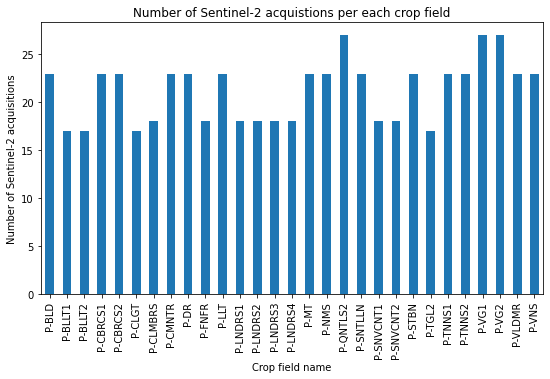

In [4]:
s2_df['crop_field_name'].value_counts().sort_index().plot(title = 'Number of Sentinel-2 acquistions per each crop field',
                                                                       xlabel = 'Crop field name', 
                                                                       ylabel = 'Number of Sentinel-2 acquisitions',
                                                                       kind = 'bar',
                                                                       figsize=(9,5));

In [5]:
print('Mean acquisitions per field, with Sentinel-2: ' + str(int(np.mean(s2_df['crop_field_name'].value_counts()))))
print('Standard deviation acquisitions per field, with Sentinel-2: ' + str(int(np.std(s2_df['crop_field_name'].value_counts()))))

Mean acquisitions per field, with Sentinel-2: 21
Standard deviation acquisitions per field, with Sentinel-2: 3


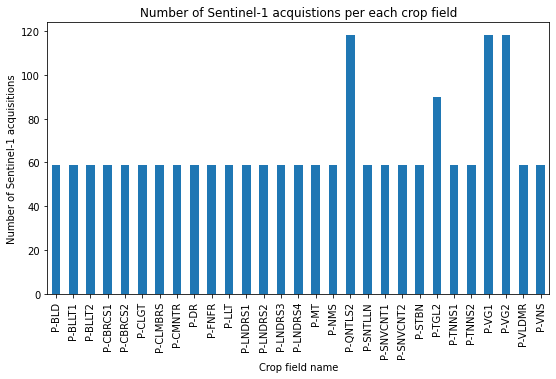

In [6]:
s1_df['crop_field_name'].value_counts().sort_index().plot(title = 'Number of Sentinel-1 acquistions per each crop field',
                                                                       xlabel = 'Crop field name', 
                                                                       ylabel = 'Number of Sentinel-1 acquisitions',
                                                                       kind = 'bar',
                                                                       figsize=(9,5));

In [7]:
print('Mean acquisitions per field, with Sentinel-1: ' + str(int(np.mean(s1_df['crop_field_name'].value_counts()))))
print('Standard deviation acquisitions per field, with Sentinel-1: ' + str(int(np.std(s1_df['crop_field_name'].value_counts()))))

Mean acquisitions per field, with Sentinel-1: 66
Standard deviation acquisitions per field, with Sentinel-1: 18


## Simple statistics

The `describe()` method is a built-in function in Pandas library that is used to generate a summary of the statistical measures of the numeric columns in a Pandas DataFrame. It provides useful insights into the central tendency, dispersion, and shape of the distribution of the data.

There are several reasons why calling the `describe()` method on a DataFrame can be useful:
* *Data Exploration:* it provides a quick and easy way to get a summary of the key statistical measures of the data, including the count, mean, standard deviation, minimum, and maximum values, as well as the quartiles. This can be useful in exploring the data and gaining an initial understanding of the data distribution.
* *Data Cleaning:* it can help identify outliers or anomalies in the data. For example, if the minimum or maximum values are significantly different from the rest of the data, it could indicate a data entry error or other issues that need to be addressed.
* *Data Preparation:* it can help in deciding how to preprocess the data. For example, if the mean and median are significantly different, it may indicate that the data is skewed and needs to be transformed before using certain algorithms.
* *Data Visualization:* it can help identify the range of values in the data, which can be useful in deciding how to plot the data for visualization purposes.

Overall, calling the `describe()` method on a DataFrame is a simple and effective way to gain insights into the data and identify potential issues that need to be addressed before further analysis.

In [8]:
s2_df.describe()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,...,NDRE3,CARI1,CARI2,MCARI,MCARI1,MCARI2,BSI,GLI,ALTERATION,SDI
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,...,615.000000,6.150000e+02,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,1652.365129,1742.176032,1998.975264,1886.871084,2485.290488,3961.929616,4439.184581,4633.184917,4692.157163,5074.745212,...,0.022943,5.179369e+05,10449.024477,-1941.268705,4189.628279,0.000062,-0.103519,0.082858,1.426646,2180.636048
std,1458.503556,1401.513325,1243.557953,1225.544592,1176.329862,1022.585343,1048.001869,1079.166361,1016.708172,1986.133708,...,0.014101,4.726324e+05,4154.129271,959.441398,1984.563854,0.000025,0.128183,0.100936,0.200939,1251.569834
min,1.000000,58.993399,390.964286,164.101124,836.369431,1215.704655,1274.939005,1323.598716,1331.067416,1264.300725,...,-0.031273,1.136173e+05,1836.084458,-8232.857487,349.358661,0.000003,-0.509948,-0.026399,1.042326,-777.597428
25%,1153.654961,1259.354925,1602.219731,1395.591005,2067.809977,3394.710374,3786.761299,3983.391104,4130.892523,4158.202790,...,0.013803,3.292638e+05,8148.569112,-2030.843864,2473.076416,0.000051,-0.196701,0.022855,1.322524,1139.268490
50%,1305.602439,1409.627232,1724.349620,1616.811594,2275.730496,3849.925134,4389.795874,4583.288770,4672.150313,4686.791449,...,0.021033,3.866387e+05,10337.678888,-1770.126736,4180.586375,0.000064,-0.105332,0.063885,1.419998,2191.749177
75%,1498.775097,1605.791453,1894.797614,1969.289040,2515.786849,4431.291989,5040.216743,5261.083128,5320.154572,5436.422729,...,0.029158,4.641596e+05,12309.972289,-1570.554821,5816.289080,0.000069,-0.019985,0.104716,1.492237,3159.434308
max,11172.265625,10768.265625,10200.377232,9841.024554,10439.627232,10024.888393,9751.816964,10096.694196,9485.082589,16854.886161,...,0.106416,3.910150e+06,47454.504137,-337.551069,8478.341044,0.000163,0.183072,0.658726,2.208223,4869.203616


In [9]:
s1_df.describe()

,VV,VH,AVE,DIF,RAT1,RAT2,NDI,RVI
count,1911.000000,1911.000000,1911.000000,1911.000000,1911.000000,1911.000000,1911.000000,1911.000000
mean,0.083003,0.017278,0.050141,0.065725,6.290372,0.281265,0.595817,0.808366
std,0.068862,0.006799,0.035945,0.066396,4.426617,0.084174,0.088824,0.177647
min,0.020154,0.002903,0.013413,0.010744,2.006848,0.069664,0.145322,0.252169
25%,0.053122,0.012607,0.033390,0.039719,4.460261,0.228200,0.537511,0.703624
50%,0.071451,0.016366,0.044105,0.054127,5.372184,0.276593,0.593286,0.813427
75%,0.091912,0.020872,0.056287,0.073006,6.737666,0.330782,0.648188,0.924977
max,1.351091,0.072686,0.687669,1.326844,76.683484,1.072281,0.873915,1.709357


## Correlations
Correlations are important because they help us understand the relationship between two variables. In statistics, a correlation is a measure of how strongly two variables are related to each other. Correlations can be positive, indicating that as one variable increases, the other also increases, or negative, indicating that as one variable increases, the other decreases.

Before considering correlations, since value ranges for the different features are belonging into different value ranges is important to apply a normalization technique (a well known one is the Min-Max scaling, but also others can be considered).

### Min-Max scaling

Min-max scaling is a normalization technique that is often used in data preprocessing to scale numerical data in a way that all features have the same range of values. This is particularly useful when dealing with features that have different units or scales, as it helps to put them on a common scale and avoid biases in the analysis.

When analyzing correlations between variables, it is important to ensure that the variables are on the same scale. If the variables are not on the same scale, the correlation coefficient may not accurately reflect the true relationship between the variables. For example, if one variable has a much larger range of values than another variable, it may appear to have a stronger correlation with other variables, simply because of the larger range of values.

By performing min-max scaling, we can ensure that all features have the same range of values, and thus, the correlation coefficient can more accurately reflect the true relationship between the variables. This is particularly important when using techniques such as principal component analysis (PCA), where the variables are transformed into a new set of variables that are linearly uncorrelated. If the variables are not on the same scale, the resulting transformed variables may be biased towards features with larger ranges of values.

In [10]:
# Define the scaler Object
scaler = MinMaxScaler(feature_range=(-1, 1))

In [11]:
# Apply Min-Max scaling on Sentinel 2 dataset
numeric_columns = s2_df.select_dtypes(include=['number']).columns
s2_df[numeric_columns] = scaler.fit_transform(s2_df[numeric_columns])
# Show the normalized dataframe
s2_df

,crop_field_name,s2_acquisition_date,B1,B2,B3,B4,B5,B6,B7,B8,...,CARI1,CARI2,MCARI,MCARI1,MCARI2,BSI,GLI,ALTERATION,SDI,manure_dates
0,P-BLD,2022-01-06,-0.999774,-0.988610,-0.967566,-0.985544,-0.954285,-0.493404,-0.369813,-0.329581,...,-0.825196,-0.862073,0.972741,0.452184,0.365908,-0.687472,0.760637,0.894845,0.496258,['2022-05-26']
1,P-BLD,2022-01-16,-0.986244,-0.980475,-0.965742,-0.982959,-0.952492,-0.466722,-0.319197,-0.289522,...,-0.834437,-0.860288,0.964406,0.512262,0.294452,-0.687473,0.598825,0.934010,0.550222,['2022-05-26']
2,P-BLD,2022-01-26,-0.804638,-0.791678,-0.756384,-0.768518,-0.718373,-0.204730,-0.042320,-0.029189,...,-0.867292,-0.623614,0.680267,0.549094,-0.192221,-0.287291,-0.563725,-0.221555,0.614427,['2022-05-26']
3,P-BLD,2022-02-05,-0.772499,-0.762061,-0.713284,-0.737590,-0.662722,-0.012081,0.204052,0.218888,...,-0.859336,-0.519082,0.630236,0.972251,-0.327450,-0.300936,-0.530213,-0.129089,0.939316,['2022-05-26']
4,P-BLD,2022-02-10,-0.491968,-0.456935,-0.463956,-0.460932,-0.507656,-0.305339,-0.212154,-0.230517,...,-0.409904,-0.735731,0.453443,-0.307436,-0.476214,-0.020641,-0.844480,-0.684078,0.174192,['2022-05-26']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,P-VNS,2022-08-19,-0.775767,-0.746216,-0.733351,-0.680862,-0.706860,-0.521163,-0.428547,-0.421958,...,-0.886710,-0.667733,0.651127,-0.432959,-0.207795,0.608256,-0.827036,-0.421069,-0.443464,['2022-04-23']
611,P-VNS,2022-10-23,-0.273374,-0.259075,-0.323362,-0.338102,-0.400707,-0.314334,-0.271037,-0.267628,...,-0.375708,-0.732382,0.337290,-0.595631,-0.662021,0.176872,-0.928100,-0.888701,-0.247320,['2022-04-23']
612,P-VNS,2022-11-12,-0.741736,-0.711742,-0.678056,-0.626190,-0.635264,-0.400802,-0.313027,-0.297275,...,-0.866362,-0.548865,0.582301,-0.084222,-0.290588,0.369936,-0.738403,-0.356361,-0.065472,['2022-04-23']
613,P-VNS,2022-11-17,-0.797327,-0.756099,-0.727651,-0.696704,-0.693158,-0.394751,-0.282709,-0.275143,...,-0.864182,-0.630699,0.648991,0.124975,-0.177028,0.226594,-0.665943,-0.266917,0.090420,['2022-04-23']


In [12]:
# Apply Min-Max scaling on Sentinel 1 dataset
numeric_columns = s1_df.select_dtypes(include=['number']).columns
s1_df[numeric_columns] = scaler.fit_transform(s1_df[numeric_columns])
# Show the normalized dataframe
s1_df

,crop_field_name,s1_acquisition_date,VV,VH,AVE,DIF,RAT1,RAT2,NDI,RVI,manure_dates
0,P-BLD,2022-01-07,-0.890795,-0.367232,-0.865064,-0.913227,-0.935021,-0.518710,0.112917,-0.112917,['2022-05-26']
1,P-BLD,2022-01-08,-0.957417,-0.782665,-0.952315,-0.958572,-0.883751,-0.666432,0.339897,-0.339897,['2022-05-26']
2,P-BLD,2022-01-19,-0.934130,-0.718899,-0.926032,-0.938403,-0.862330,-0.657409,0.367230,-0.367230,['2022-05-26']
3,P-BLD,2022-01-20,-0.968732,-0.716619,-0.960065,-0.973516,-0.944654,-0.347523,-0.098509,0.098509,['2022-05-26']
4,P-BLD,2022-01-31,-0.949808,-0.730011,-0.942081,-0.953669,-0.892944,-0.617541,0.301302,-0.301302,['2022-05-26']
...,...,...,...,...,...,...,...,...,...,...,...
1914,P-VNS,2022-11-28,-0.844030,-0.281150,-0.814454,-0.870499,-0.883937,-0.598930,0.259772,-0.259772,['2022-04-23']
1915,P-VNS,2022-12-09,-0.915032,-0.462748,-0.893928,-0.932672,-0.916862,-0.455311,0.061839,-0.061839,['2022-04-23']
1916,P-VNS,2022-12-10,-0.895726,-0.671333,-0.885667,-0.902088,-0.845541,-0.725197,0.475577,-0.475577,['2022-04-23']
1917,P-VNS,2022-12-21,-0.944523,-0.732063,-0.936971,-0.948216,-0.886558,-0.597532,0.257864,-0.257864,['2022-04-23']


### Standard correlations

In [13]:
# Sentinel 2
s2_df.corr()

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,...,NDRE3,CARI1,CARI2,MCARI,MCARI1,MCARI2,BSI,GLI,ALTERATION,SDI
B1,1.000000,0.994930,0.992584,0.984364,0.977208,0.725146,0.574834,0.572612,0.514348,0.842610,...,-0.119196,0.915610,0.520644,-0.967172,-0.410950,-0.710853,0.197598,-0.451546,-0.565479,-0.094508
B2,0.994930,1.000000,0.996748,0.988739,0.980722,0.724716,0.572294,0.574724,0.511444,0.840469,...,-0.088456,0.914162,0.522753,-0.971422,-0.413219,-0.721323,0.207225,-0.461589,-0.570603,-0.099576
B3,0.992584,0.996748,1.000000,0.991119,0.991504,0.759802,0.610397,0.612222,0.553917,0.855345,...,-0.089785,0.900377,0.570421,-0.982142,-0.384438,-0.740357,0.203880,-0.459911,-0.563227,-0.075887
B4,0.984364,0.988739,0.991119,1.000000,0.989272,0.695611,0.536963,0.537085,0.484238,0.804190,...,-0.104207,0.866092,0.611020,-0.988377,-0.476966,-0.775162,0.313668,-0.521590,-0.612233,-0.185296
B5,0.977208,0.980722,0.991504,0.989272,1.000000,0.778693,0.629874,0.632369,0.584092,0.856173,...,-0.074720,0.858564,0.658594,-0.994321,-0.378257,-0.771103,0.244017,-0.467580,-0.549895,-0.088220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MCARI2,-0.710853,-0.721323,-0.740357,-0.775162,-0.771103,-0.580027,-0.493250,-0.480795,-0.484972,-0.577770,...,0.220807,-0.499187,-0.696441,0.794877,0.373925,1.000000,-0.466645,0.669573,0.690301,0.249972
BSI,0.197598,0.207225,0.203880,0.313668,0.244017,-0.263260,-0.385603,-0.396706,-0.369690,-0.167134,...,-0.211271,-0.036184,0.426119,-0.317812,-0.834976,-0.466645,1.000000,-0.735476,-0.648309,-0.915872
GLI,-0.451546,-0.461589,-0.459911,-0.521590,-0.467580,-0.120656,-0.035248,-0.002479,-0.025780,-0.158311,...,0.418968,-0.233868,-0.414319,0.521196,0.587497,0.669573,-0.735476,1.000000,0.913040,0.546838
ALTERATION,-0.565479,-0.570603,-0.563227,-0.612233,-0.549895,-0.158203,-0.038405,-0.005060,0.000671,-0.222315,...,0.438460,-0.377820,-0.371422,0.590464,0.640511,0.690301,-0.648309,0.913040,1.000000,0.549763


In [14]:
# Sentinel 1
s1_df.corr()

,VV,VH,AVE,DIF,RAT1,RAT2,NDI,RVI
VV,1.000000,0.405634,0.996256,0.995610,0.770229,-0.337744,0.367571,-0.367571
VH,0.405634,1.000000,0.483133,0.318296,-0.130520,0.217865,-0.246520,0.246520
AVE,0.996256,0.483133,1.000000,0.983790,0.725451,-0.302917,0.328777,-0.328777
DIF,0.995610,0.318296,0.983790,1.000000,0.812208,-0.372602,0.406471,-0.406471
RAT1,0.770229,-0.130520,0.725451,0.812208,1.000000,-0.535703,0.599621,-0.599621
RAT2,-0.337744,0.217865,-0.302917,-0.372602,-0.535703,1.000000,-0.980415,0.980415
NDI,0.367571,-0.246520,0.328777,0.406471,0.599621,-0.980415,1.000000,-1.000000
RVI,-0.367571,0.246520,-0.328777,-0.406471,-0.599621,0.980415,-1.000000,1.000000
